In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [120]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [121]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [123]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [124]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

In [126]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [127]:
df.duplicated().sum()

403

In [128]:
df = df.drop_duplicates(keep='first')

In [129]:
df.duplicated().sum()

0

# EDA

In [130]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [131]:
df['target'] = label_encoder.fit_transform(df['target'])

In [132]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [133]:
df['num_characters'] = df['text'].apply(len)

In [134]:
df.sample(5)

,target,text,num_characters
4331,0,ALSO TELL HIM I SAID HAPPY BIRTHDAY,35
3524,0,I not free today i haf 2 pick my parents up to...,53
1571,0,Near kalainar tv office.thenampet,33
1263,0,Ok. No wahala. Just remember that a friend in ...,54
2605,0,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...,136


In [135]:
df['num_words']  = df['text'].apply(lambda x: len(word_tokenize(x)))

In [136]:
df['num_sentences']  = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [137]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
531,0,What Today-sunday..sunday is holiday..so no wo...,50,11,1
4991,0,I'm hungry buy smth home...,27,7,1
5028,1,I'd like to tell you my deepest darkest fantas...,126,26,3
1389,0,"Haha... Where got so fast lose weight, thk muz...",115,30,1
2726,0,No i am not having not any movies in my laptop,46,11,1


<Axes: xlabel='target', ylabel='count'>

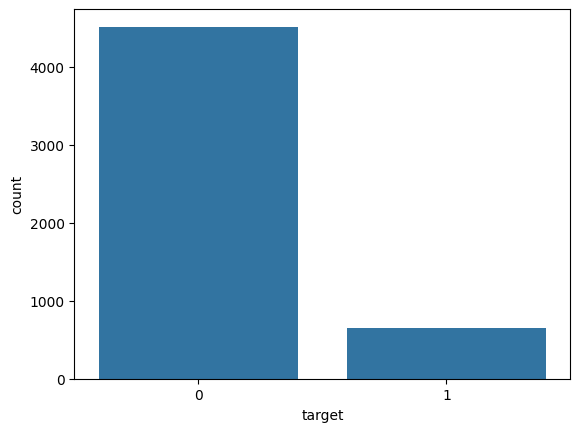

In [138]:
sns.countplot(x= df['target'])

In [139]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [140]:
df[['num_characters', 'num_words', 'num_sentences']].corr()

,num_characters,num_words,num_sentences
num_characters,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


<Axes: >

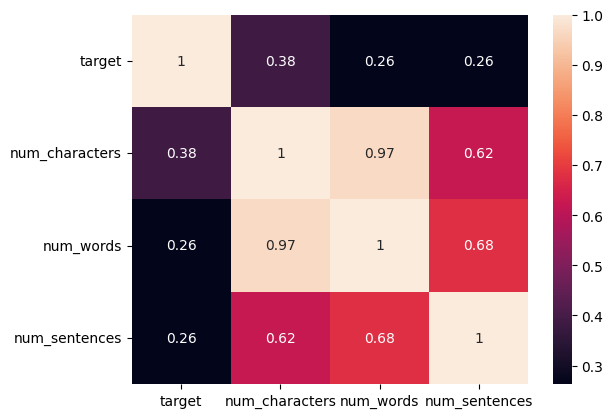

In [141]:
sns.heatmap(df[['target','num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

# Pre Processing
- Lower case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuations
- Stemming

In [142]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string

In [143]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [145]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [146]:
english_stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [147]:
def text_transform(text):
    # Convert to lowercase, tokenize, and remove non-alphanumeric characters
    tokens = [word for word in word_tokenize(text.lower()) if word.isalnum()]
    
    # Remove stop words and punctuation, and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in english_stopwords and word not in string.punctuation]
    
    return ' '.join(tokens)

In [148]:
text_transform('Did you Like PREsenting PPT on ML DAncinG?')

'like present ppt ml danc'

In [149]:
df['transformed_text'] = df['text'].apply(text_transform)

In [150]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [151]:
from collections import Counter
spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in (msg.split()):
        spam_corpus.append(word)

In [152]:
Counter(spam_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [153]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in (msg.split()):
        ham_corpus.append(word)

In [154]:
Counter(ham_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

# Model Building

In [169]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [170]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [171]:
X.shape

(5169, 6708)

In [172]:
y = df['target']

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [175]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics

In [176]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [177]:
gnb.fit(X_train, y_train)

GaussianNB()

In [178]:
pred_1 = gnb.predict(X_test)

In [179]:
print('Accuracy Score', metrics.accuracy_score(y_test, pred_1))
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, pred_1))
print('Precision Score', metrics.precision_score(y_test, pred_1))

Accuracy Score 0.8762088974854932
Confusion Matrix
 [[793 103]
 [ 25 113]]
Precision Score 0.5231481481481481


In [180]:
mnb.fit(X_train, y_train)
pred_2 = mnb.predict(X_test)
print('Accuracy Score', metrics.accuracy_score(y_test, pred_2))
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, pred_2))
print('Precision Score', metrics.precision_score(y_test, pred_2))

Accuracy Score 0.9593810444874274
Confusion Matrix
 [[896   0]
 [ 42  96]]
Precision Score 1.0


In [181]:
bnb.fit(X_train, y_train)
pred_3 = bnb.predict(X_test)
print('Accuracy Score', metrics.accuracy_score(y_test, pred_3))
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, pred_3))
print('Precision Score', metrics.precision_score(y_test, pred_3))

Accuracy Score 0.9700193423597679
Confusion Matrix
 [[893   3]
 [ 28 110]]
Precision Score 0.9734513274336283


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [183]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()

In [184]:
clfs = {
    'SVC':svc,
    'KN': knc,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [185]:
def training(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    return accuracy, precision

In [187]:
accuracy_score = []
precision_score = []

for name,clf in clfs.items():
    c_acc, c_prec = training(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print('Accuracy', c_acc)
    print('Precision', c_prec)
    
    accuracy_score.append(c_acc)
    precision_score.append(c_prec)

For SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
For KN
Accuracy 0.9003868471953579
Precision 1.0
For DTC
Accuracy 0.9361702127659575
Precision 0.8461538461538461
For LRC
Accuracy 0.9468085106382979
Precision 0.9882352941176471
For RFC
Accuracy 0.9748549323017408
Precision 1.0
For ABC
Accuracy 0.9613152804642167
Precision 0.9454545454545454
For BC
Accuracy 0.9564796905222437
Precision 0.8842975206611571
For ETC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For GBDT
Accuracy 0.960348162475822
Precision 0.9217391304347826


In [188]:
perf_df = pd.DataFrame({'Algo':clfs.keys(), 
                        'Accuracy': accuracy_score,
                        'Precision': precision_score,
                       })

In [190]:
perf_df.sort_values('Precision', ascending=False)

,Algo,Accuracy,Precision
1,KN,0.900387,1.000000
4,RFC,0.974855,1.000000
3,LRC,0.946809,0.988235
7,ETC,0.975822,0.974790
0,SVC,0.972921,0.974138
5,ABC,0.961315,0.945455
8,GBDT,0.960348,0.921739
6,BC,0.956480,0.884298
2,DTC,0.936170,0.846154


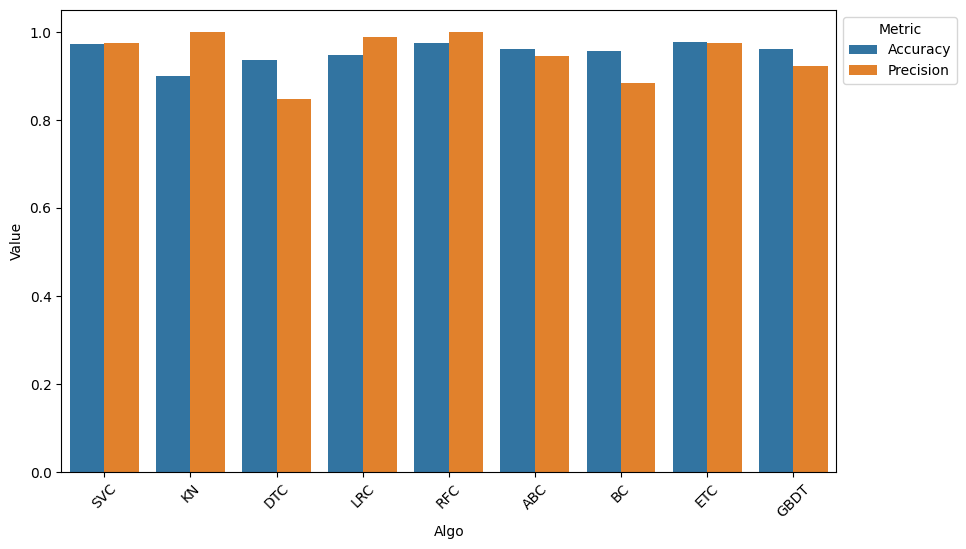

In [203]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plotting both accuracy and precision in the same bar plot for each algorithm
# We use `melt` to transform the DataFrame so that we have only two columns for the values and one for the identifiers
perf_melted = perf_df.melt('Algo', var_name='Metric', value_name='Value')

# Create the barplot
barplot = sns.barplot(x='Algo', y='Value', hue='Metric', data=perf_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend and informative axis label
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1,1))
# Show the plot
plt.show()

# Overall Result:
   Selected model:
   - Random Forest
   - Naive Bayes (MultinomialNB)
   - K Nearest Neighbour